In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

#data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn1/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0172-09.IAGE.nc')
#plotvar = data.variables['IAGE'][0,:,:]
#lont = data.variables['TLONG']
#latt = data.variables['TLAT']
#############0117-09

In [3]:
data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn1/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0172-09.IAGE.nc')    
plotvar = data.variables['IAGE'][0,:,:]

In [4]:
lont = data.variables['TLONG']
latt = data.variables['TLAT']
lont = lont[:340,1130]
latt = latt[:340,1130]
plot1 = plotvar[30,:340,1130]

In [9]:
mask = plotvar[50,:340,1130]
plot1[mask >2000] = np.nan
plot1[mask == -1] = np.nan

In [10]:
plot1

masked_array(data=[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                   nan, nan, nan, nan,

In [4]:
#lont = lont[:,:]
#latt = latt[:,:]
#plotvar = plotvar[:,:,:]
#lont = lont[220:340,1100:1300]
#latt = latt[220:340,1100:1300]
#plotvar = plotvar[220:340,1100:1300]

In [5]:
data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn1/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0172-09.IAGE.nc')    
plotvar = data.variables['IAGE'][0,:,:]

lont = data.variables['TLONG']
latt = data.variables['TLAT']
lont = lont[220:340,600:1180]
latt = latt[220:340,600:1180]
plot1 = plotvar[30,220:340,600:1180]

        ######################################################################
lont = lont[220:340,1180:1400]
latt = latt[220:340,1180:1400]
mask = plotvar[50,220:340,1180:1400]
plot = plotvar[30,220:340,1180:1400]
plot[mask >2000] = np.nan
plot[mask == -1000] = np.nan




In [6]:
#data1=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn1/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0141-07.z_t.nc')
#depth = data1.variables['z_t'][:]/100

In [7]:
c = np.hstack((plot1,plot))

In [14]:
c.shape

(120, 800)

In [11]:
#np.nanmean(plot,axis=0)

In [15]:
lont = lont[220:340,600:1400]
latt = latt[220:340,600:1400]

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]


ValueError: zero-size array to reduction operation maximum which has no identity

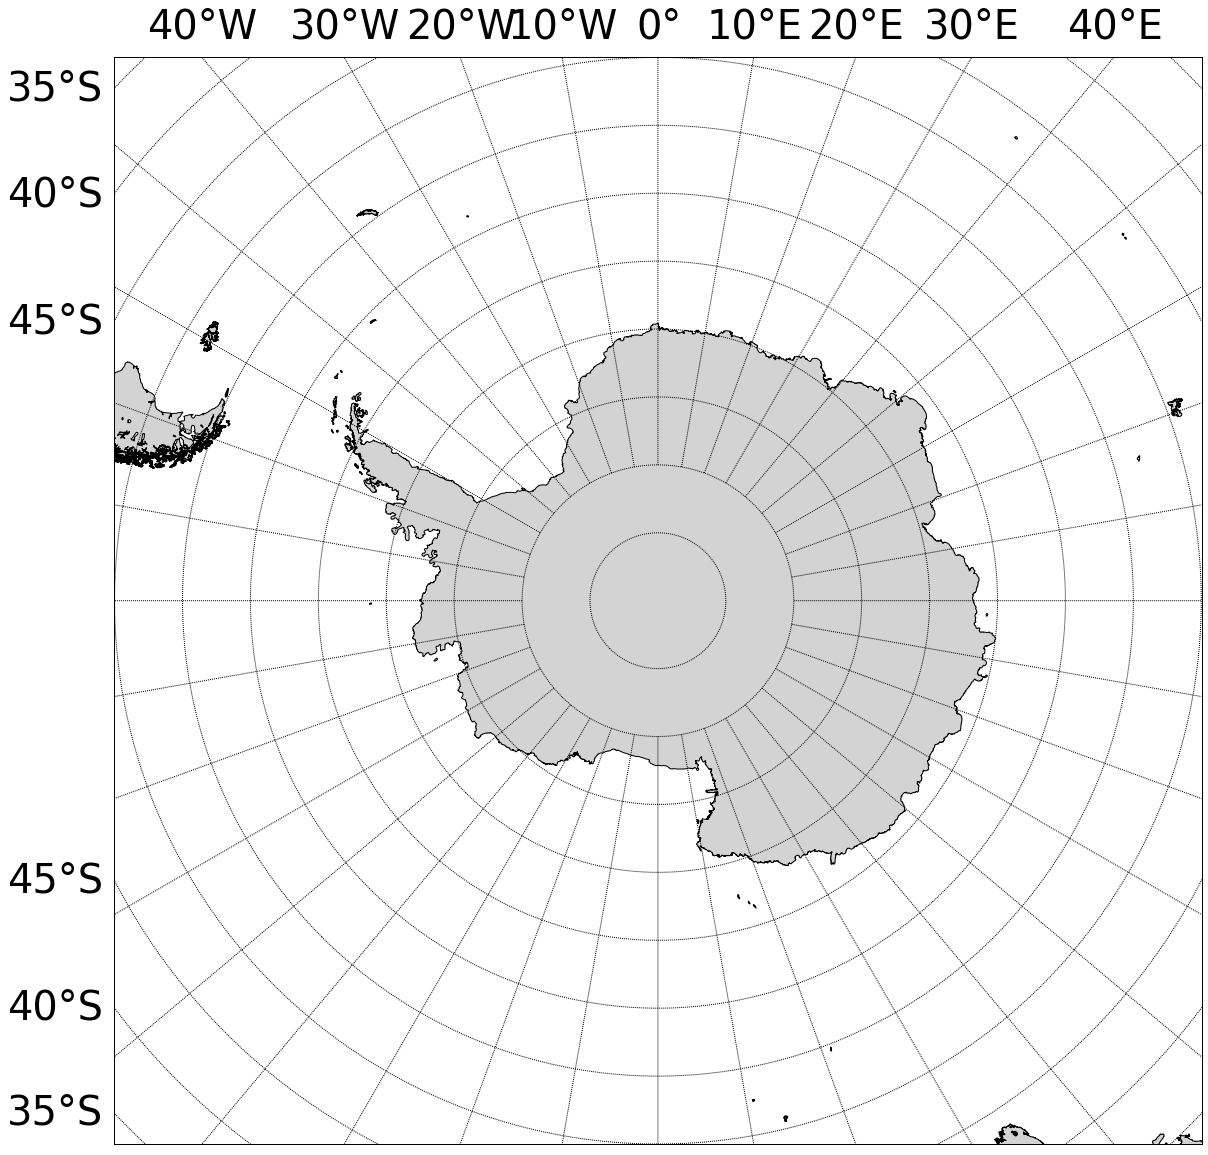

In [16]:
nice_cmap=sns.diverging_palette(245, 15, n=12,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([0,15,30,50,70,100,110,120]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [20,40,60,80,100,120,140,160]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'40'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 8900000,height = 8900000,resolution ='h') 
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
#CP = map.contourf(x,y,plotvar,cmap = new_cmap)

CP = map.contourf(x,y,c,spacing = 'uniform',levels = nice_levels,extend='both')
#cmap = new_cmap,norm =norm,
#for c in CP.collections:
    #c.set_edgecolor("face")
#CS=map.contour(x,y,plotvar,[0.1,0.2],colors = 'b', linestyles = 'solid',linewidths=3)
#CS=map.contour(x,y,plotvar,colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=30)
CP.cmap.set_over('yellow')
CP.cmap.set_under('black')
cbar =map.colorbar(CP,extend='both',extendfrac='auto')
#cbar =map.colorbar(CP)
cbar.ax.tick_params(labelsize=45) 
cbar.set_label('(years)', **my_font)
plt.xlabel("Time 0171-09 (depth = 45m)",**my_font)
plt.savefig("iage.png")

In [ ]:
plotvar.mask = ma.nomask
plotvar[plotvar >1000] = np.nan


In [ ]:
aveplot = plotvar.mean(axis=1)
aveplot.mask = ma.nomask
aveplot[aveplot >1000 ] = np.nan

In [ ]:
aveplot[45]

In [ ]:

aveplot.mask = ma.nomask
aveplot = aveplot.mean(axis=1)
aveplot.mask = ma.nomask
aveplot[aveplot >300 ] = np.nan

In [ ]:
aveplot[42,:]

In [ ]:
#plotvar[:,5]

In [ ]:
lont = lont[250:344,1100:1300]
latt = latt[250:344,1100:1300]
plotvar = plotvar[250:344,1100:1300]

In [ ]:
#plotvar.mask = ma.nomask

In [ ]:
#aveplot = plotvar.mean(axis=0)

In [ ]:
#aveplot[20]

In [ ]:
#plotvar[plotvar <0 ] = np.nan
#plotvar[plotvar >200 ] = np.nan

In [ ]:
#[30,20].fill_value(np.nan)

In [ ]:
#aveplot = np.mean(plotvar,axis=0)
#aveplot[aveplot >1000 ] = np.nan

In [ ]:
nice_cmap=sns.diverging_palette(245, 15, n=12,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([0,15,30,50,70,100,110,120]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [20,40,60,80,100,120,140,160]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'40'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 8900000,height = 8900000,resolution ='h') 
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
#CP = map.contourf(x,y,plotvar,cmap = new_cmap)

CP = map.contourf(x,y,plotvar,spacing = 'uniform',levels = nice_levels,extend='both')
#cmap = new_cmap,norm =norm,
#for c in CP.collections:
    #c.set_edgecolor("face")
#CS=map.contour(x,y,plotvar,[0.1,0.2],colors = 'b', linestyles = 'solid',linewidths=3)
#CS=map.contour(x,y,plotvar,colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=30)
CP.cmap.set_over('yellow')
CP.cmap.set_under('black')
cbar =map.colorbar(CP,extend='both',extendfrac='auto')
#cbar =map.colorbar(CP)
cbar.ax.tick_params(labelsize=45) 
cbar.set_label('(years)', **my_font)
plt.xlabel("Time 0171-09 (depth = 3133m)",**my_font)
plt.savefig("iage.png")